In [1]:
import pandas as pd
import numpy as np
import pymysql
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

In [2]:
user = 'xxx'
host = 'xxx'
password = 'xxx'
dbname = 'xxx'

In [3]:
engine = create_engine('xxx')

In [4]:
df_examGrades = pd.read_sql_query('SELECT * FROM examGrades', engine)
df_ALPdata = pd.read_sql_query('SELECT * FROM ALPdata', engine)
df_canvasClickstream = pd.read_sql_query('SELECT * FROM canvasClickstream', engine)
df_notes = pd.read_sql_query('SELECT * FROM ALPnotes', engine)

In [5]:
df_ALPdata.head()

,id,userId,sectionId,thisDate,ActivitiesCorrect,ActivitiesCorrectMax,ActivitiesCorrectPercent,ActivitiesParticipation,ActivitiesParticipationMax,ActivitiesParticipationPercent,...,SlideDeckViewCount,SlideNote,SlideQuestion,SlideView,VideoTimeConfused,VideoTimeNote,VideoTimeQuestion,VideoTimeView,VideoView,VideoViewCount
0,1081729,554e46b3-7943-4a51-b87f-78b269c5d7b3,f7898b25-13ea-405c-a9ef-70987018cd8f,2016-01-27,0,0,-1.0,2,2,1.0,...,5,99,0,15,0,0,0,0,0,0
1,1081730,a890967e-f6db-4e85-a0c4-268cc4c19a37,f7898b25-13ea-405c-a9ef-70987018cd8f,2016-01-27,0,0,-1.0,2,2,1.0,...,5,0,0,13,0,0,0,0,0,0
2,1081731,5ccabcf2-281d-4c26-94dd-d6a1db1c68bc,f7898b25-13ea-405c-a9ef-70987018cd8f,2016-01-27,0,0,-1.0,2,2,1.0,...,4,149,0,17,0,0,0,0,0,0
3,1081732,9bfbe92c-272f-4e3f-a85a-3dacb245c8ab,f7898b25-13ea-405c-a9ef-70987018cd8f,2016-01-27,0,0,-1.0,2,2,1.0,...,5,228,0,15,0,0,0,0,0,0
4,1081733,50f19fd5-c4af-4cd6-92b2-9556875d389b,f7898b25-13ea-405c-a9ef-70987018cd8f,2016-01-27,0,0,-1.0,2,2,1.0,...,5,164,0,15,0,0,0,0,0,0


In [6]:
df_examGrades = df_examGrades[df_examGrades.grade>=0]
df_examGrades.head()

,institutionId,courseId,sectionId,userId,examId,grade
1,f37051ac-59bb-49d3-bcc6-eaf705bea2c1,c86c8c8d-dca6-41cd-a010-a83e40d93e75,c9d30194-3af5-4c44-8241-7117ce0a6e8c,03c61c8e-941c-4cce-8391-979df9edf12b,2014040001,67.0
2,f37051ac-59bb-49d3-bcc6-eaf705bea2c1,c86c8c8d-dca6-41cd-a010-a83e40d93e75,c9d30194-3af5-4c44-8241-7117ce0a6e8c,061b84d1-859f-4ece-b1b3-242841679fc1,2014040001,76.0
3,f37051ac-59bb-49d3-bcc6-eaf705bea2c1,c86c8c8d-dca6-41cd-a010-a83e40d93e75,c9d30194-3af5-4c44-8241-7117ce0a6e8c,072fc34d-b9ee-4d2f-8837-067a2375c3fc,2014040001,71.0
4,f37051ac-59bb-49d3-bcc6-eaf705bea2c1,c86c8c8d-dca6-41cd-a010-a83e40d93e75,c9d30194-3af5-4c44-8241-7117ce0a6e8c,08cec2b7-6825-463f-bb57-7daf2744a368,2014040001,68.0
5,f37051ac-59bb-49d3-bcc6-eaf705bea2c1,c86c8c8d-dca6-41cd-a010-a83e40d93e75,c9d30194-3af5-4c44-8241-7117ce0a6e8c,0b454d92-bf58-4712-abc3-0bde76660770,2014040001,91.0


In [7]:
df_examGrades_per_student_per_sec = df_examGrades.groupby(['sectionId','userId']).mean().reset_index().drop('examId',axis=1)
df_examGrades_per_student_per_sec.head()

,sectionId,userId,grade
0,4e196df0-2209-4326-8fa1-2ce050147a5c,025e114f-58a8-4186-80d5-2a97063bdf6e,67.500000
1,4e196df0-2209-4326-8fa1-2ce050147a5c,029e1faf-2475-4a9e-9e5d-82c806ce3892,73.166667
2,4e196df0-2209-4326-8fa1-2ce050147a5c,0437c501-740b-4feb-a0c1-6067e0b3d33e,82.333333
3,4e196df0-2209-4326-8fa1-2ce050147a5c,05fc8ea6-e32c-4a7f-bb94-fe5441b065b3,75.833333
4,4e196df0-2209-4326-8fa1-2ce050147a5c,0923190d-1a18-46a5-a970-10ba7f4ace8f,74.750000


In [8]:
sectionID = sorted(list(set(df_examGrades['sectionId'].values)))
sectionID

['4e196df0-2209-4326-8fa1-2ce050147a5c',
 '70bc429d-16ef-48f8-866b-95fa325f73ba',
 '8dfdebba-0bff-4501-b6fd-d44e52e30af3',
 '9eff90b9-dc9b-412b-bd84-5d179afca695',
 '9f586a42-c17b-4ec8-a2b7-96d164c2af3a',
 'c9d30194-3af5-4c44-8241-7117ce0a6e8c',
 'dc52ea23-e186-43f1-9e22-ac16a9efa956',
 'ff2876b5-1eec-460f-a52c-aa74713ed1fc']

In [9]:
df_ALPdata_sec1 = df_ALPdata[df_ALPdata.sectionId == sectionID[2]]
df_ALPdata_sec1 = df_ALPdata_sec1[['userId','sectionId','thisDate','ActivitiesCorrectPercent','ActivitiesParticipationPercent','SlideDeckViewCount','SlideView','Attendance']]
df_ALPdata_sec1.head()

,userId,sectionId,thisDate,ActivitiesCorrectPercent,ActivitiesParticipationPercent,SlideDeckViewCount,SlideView,Attendance
549630,b7b787d8-1a47-494f-ae41-0ba5ca9f806d,8dfdebba-0bff-4501-b6fd-d44e52e30af3,2017-01-04,-1.0,-1.0,0,0,0
549631,b7b787d8-1a47-494f-ae41-0ba5ca9f806d,8dfdebba-0bff-4501-b6fd-d44e52e30af3,2017-01-06,0.0,0.0,0,0,0
549632,b7b787d8-1a47-494f-ae41-0ba5ca9f806d,8dfdebba-0bff-4501-b6fd-d44e52e30af3,2017-01-09,0.0,0.0,0,0,0
549633,b7b787d8-1a47-494f-ae41-0ba5ca9f806d,8dfdebba-0bff-4501-b6fd-d44e52e30af3,2017-01-11,0.0,0.0,0,0,0
549634,b7b787d8-1a47-494f-ae41-0ba5ca9f806d,8dfdebba-0bff-4501-b6fd-d44e52e30af3,2017-01-13,0.0,0.0,0,0,0


In [10]:
df_examGrades_sec1 = df_examGrades_per_student_per_sec[df_examGrades_per_student_per_sec.sectionId == sectionID[2]].drop('sectionId',axis=1)
df_examGrades_sec1.head()

,userId,grade
313,00613d36-6173-48fa-9ae4-65bc1087a7a4,84.333333
314,031d7a96-1f3b-43ce-bc76-d2e5c544467c,84.833333
315,039ee7c8-50c6-4e46-b6fb-aa440e7b09a3,40.666667
316,0474eae2-15db-4cdb-be1d-cf66c3dbb138,91.666667
317,055bb935-7cb0-4e02-8ab9-90578f11c1a6,83.666667


In [11]:
df_canvasClickstream.head()

,canvasId,userId,sectionId,timestamp,url,web_application_controller,web_application_action
0,000006f0-8afb-0132-5442-12afc6cf9df5,1a1c3652-4fbd-4bc6-9558-210d1e8617e3,dc52ea23-e186-43f1-9e22-ac16a9efa956,2015-01-30 22:12:27,/api/v1/courses/565/pages/diy-grading-form/rev...,,
1,00001ccd-d5b8-4f1f-b25a-3fc7ad79434d,1e962333-aa64-4c19-9532-6d943e887fe9,70bc429d-16ef-48f8-866b-95fa325f73ba,2015-11-20 04:10:00,/api/v1/courses/20310/ping,courses,ping
2,0000267c-9260-4016-919e-ba44141cb9d3,e43a6bf6-7a0a-47f7-a67a-a3cd96ebbc0a,ff2876b5-1eec-460f-a52c-aa74713ed1fc,2016-04-15 12:29:00,/api/v1/courses/55315/students/submissions?pag...,submissions_api,for_students
3,0000303c-e419-4ce7-b56f-e3f934653195,ab8108c9-797e-4cb4-9fd2-8ccde819dde4,70bc429d-16ef-48f8-866b-95fa325f73ba,2015-09-22 01:12:56,/courses/20310/quizzes/2484/submissions/74331/...,quizzes/quiz_submissions,record_answer
4,0000329e-d27e-434f-bee0-57d3ec2e7dfd,78c43d70-75f1-4811-84ab-96ca50546a15,9f586a42-c17b-4ec8-a2b7-96d164c2af3a,2016-01-07 18:47:00,/api/v1/courses/32206/quizzes/13886/submission...,quizzes/quiz_submission_events_api,create


In [12]:
df_notes.head()

,courseId,sectionId,lessonId,noteId,userId,note,createdAt,updatedAt,lessonDate,votesUp,votesDown
0,2d2812d6-b11a-4ffb-89db-805e1b38f0ef,c9d30194-3af5-4c44-8241-7117ce0a6e8c,fac1f2b6-2336-4412-b33e-09e5ed84e110,000017ff-7089-4b98-8c06-66965938809c,0e3cd17a-c8ab-4871-8275-e66ef4a2aa2b,Sunlight blows apart water vapor into H and OH...,NaT,2014-09-30 07:12:42,2014-09-08 10:10:00,0,0
1,c86c8c8d-dca6-41cd-a010-a83e40d93e75,9eff90b9-dc9b-412b-bd84-5d179afca695,G_e3fb4952-c416-4869-aa42-54ebd20d3f23_2016-09...,00001a73-f1fe-4a5e-9948-2088e49eea19,0df09a08-0b8f-453e-8aef-25a99de34325,90-42-23.5=24.5 (Reason you subtract is becaus...,2016-10-04 11:22:00,2016-10-07 10:24:05,2016-09-23 10:10:00,0,0
2,7f89f815-bceb-4d52-a8ff-6c2d8112dd8a,07a2e377-3ba3-4e2e-b425-e830c9dc6012,5a091ef6-11d5-43c2-8c98-fdd893f53c50,00003912-b76a-4738-9ce6-6b98e7ee6f34,17cc5e0d-2172-4fe7-934b-d2eb46a9aa36,What is Information?,NaT,2015-12-09 23:48:04,2015-09-08 08:30:00,0,0
3,c86c8c8d-dca6-41cd-a010-a83e40d93e75,8dfdebba-0bff-4501-b6fd-d44e52e30af3,G_5bf4a233-c6ba-441d-aa9c-8f5d87153b76_2017-01...,00007d6c-805b-460c-908c-564f75c401a7,c6e1b941-face-4d69-8608-101480df0dc7,Heat in cities = hotter,2017-01-13 10:47:19,2017-02-03 10:40:51,2017-01-13 10:10:00,0,0
4,1fdb825b-983a-43ae-8cc5-8d079f0d4fc0,3e911e50-2db5-4d14-bd64-87bda078d876,99e142ae-037a-4cd3-9061-84102c369c47,0000a60c-56e8-4c36-a6d4-e45f7765678c,0e8fc6bc-bd05-4e35-990a-8a69345b1421,hyoglycemia,NaT,2016-01-14 13:30:51,2016-01-12 13:00:00,0,0


In [13]:
def generate_inter_arrival(x):
    x.sort()
    r = []
    for i in range(len(x)-1):
        q = x[i+1] - x[i]
        r.append(int(q.astype('timedelta64[s]')/np.timedelta64(1, 's')))
    return r

def rat_pos(x):
    R = 0
    r = len(x)
    for i in range(r-1):
        for j in range(i,r):
            if x[i] < x[j]:
                R += 1
    res = (r*(r-1)/2-R-(r*(r-1)/4)+0.5)/np.sqrt((2*r+5)*(r-1)*r/72)
    if res == np.inf:
        return 0
    return res


def rat_neg(x):
    R = 0
    r = len(x)
    for i in range(r-1):
        for j in range(i,r):
            if x[i] < x[j]:
                R += 1
    res = (R-(r*(r-1)/4)+0.5)/np.sqrt((2*r+5)*(r-1)*r/72)
    if res == np.inf:
        return 0
    return res

In [14]:
df_note_trend_sec1 = df_notes[['sectionId','userId','updatedAt']][df_notes.sectionId == sectionID[2]]
df_note_trend_sec1.head()

,sectionId,userId,updatedAt
3,8dfdebba-0bff-4501-b6fd-d44e52e30af3,c6e1b941-face-4d69-8608-101480df0dc7,2017-02-03 10:40:51
18,8dfdebba-0bff-4501-b6fd-d44e52e30af3,ca810bd0-5feb-4045-8703-4b0d9a85893b,2017-03-07 14:24:09
20,8dfdebba-0bff-4501-b6fd-d44e52e30af3,6df303e8-590d-4c75-a821-0f66f7e87350,2017-03-09 08:19:10
36,8dfdebba-0bff-4501-b6fd-d44e52e30af3,9c7a73ac-91b1-4559-ad3d-03abed0f8db1,2017-02-03 10:54:02
45,8dfdebba-0bff-4501-b6fd-d44e52e30af3,46c18ed3-9e88-4cf1-a1e7-4244d64c8856,2017-03-10 10:32:55


In [15]:
res = []
for i in df_note_trend_sec1.userId.unique():
    x = df_note_trend_sec1[df_note_trend_sec1['userId']==i]
    x = x.updatedAt.values
    r = generate_inter_arrival(x)
    res.append([i, rat_pos(r), rat_neg(r)])
    
df_note_rat_sec1 = pd.DataFrame(res, columns=['userId','RAT+', 'RAT-'])
df_note_rat_sec1

,userId,RAT+,RAT-
0,c6e1b941-face-4d69-8608-101480df0dc7,36.082900,-36.082740
1,ca810bd0-5feb-4045-8703-4b0d9a85893b,10.595844,-10.594517
2,6df303e8-590d-4c75-a821-0f66f7e87350,28.785340,-28.784948
3,9c7a73ac-91b1-4559-ad3d-03abed0f8db1,24.832835,-24.832310
4,46c18ed3-9e88-4cf1-a1e7-4244d64c8856,52.652343,-52.652256
5,1a808ada-c955-44a1-a313-9831b1d5d34b,44.279506,-44.279399
6,eb588ee6-cfaf-46bc-b205-9ae4be28ed08,29.429976,-29.429627
7,b6420928-bf3e-440c-9de8-2d7478df6b13,5.844740,-5.842224
8,7095f690-6339-4537-987a-49d76cff5b94,15.195941,-15.195334
9,ee306629-2b5d-49e0-a80e-e00c20ff627c,42.868839,-42.868728


In [60]:
df_sec1 = df_ALPdata_sec1.merge(df_note_rat_sec1, on='userId',how='left').dropna()
df_sec1 = df_sec1.merge(df_examGrades_sec1, on='userId',how='left').dropna()

max_score = df_sec1.grade.max()
df_sec1['label'] = 2
df_sec1.loc[(df_sec1.grade >- (max_score*0.6)) & (df_sec1.grade < (max_score*0.8)),'label'] = 1
df_sec1.loc[df_sec1.grade < (max_score*0.6),'label'] = 0
# df_sec1 = df_sec1.groupby('userId').mean()
df_sec1.head()

,userId,sectionId,thisDate,ActivitiesCorrectPercent,ActivitiesParticipationPercent,SlideDeckViewCount,SlideView,Attendance,RAT+,RAT-,grade,label
0,74c752ac-bc42-46e6-9e3b-c2834272ab5b,8dfdebba-0bff-4501-b6fd-d44e52e30af3,2017-01-04,-1.0,-1.0,1,3,1,11.183632,-11.183450,94.000000,2
1,b09581a6-0418-437c-b98d-ed3209f16f4f,8dfdebba-0bff-4501-b6fd-d44e52e30af3,2017-01-04,-1.0,-1.0,1,6,1,8.098578,-8.097083,79.833333,2
2,aaaf27c8-fc5d-4310-9613-fcc771dba8ff,8dfdebba-0bff-4501-b6fd-d44e52e30af3,2017-01-04,-1.0,-1.0,0,0,0,16.887731,-16.886750,90.166667,2
3,99a0fd51-94bb-444a-8bf8-a9f3752df697,8dfdebba-0bff-4501-b6fd-d44e52e30af3,2017-01-04,-1.0,-1.0,0,1,0,-2.509078,2.548591,76.000000,1
4,c28dbc72-c577-4223-abaf-acdf2f1bf829,8dfdebba-0bff-4501-b6fd-d44e52e30af3,2017-01-04,-1.0,-1.0,0,1,1,24.044925,-24.044216,67.000000,1


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split, cross_val_score

X, y = df_sec1[["ActivitiesCorrectPercent","ActivitiesParticipationPercent","SlideDeckViewCount","SlideView","Attendance"]], df_sec1.ix[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 14)

rf_clf = Pipeline((
        ['sca',StandardScaler()],
        ['clf',RandomForestClassifier()],
        ))
rf_clf.fit(X_train,y_train)
y_test_pred = rf_clf.predict(X_test)

In [62]:
cross_val_score(rf_clf, X, y)

array([ 0.5027027 ,  0.47621622,  0.53409091])

In [63]:
# without trends
confusion_matrix(y_test, y_test_pred)

array([[  5,  20,  50],
       [  6,  98, 282],
       [ 20, 150, 479]])

In [64]:
X, y = df_sec1[["ActivitiesCorrectPercent","ActivitiesParticipationPercent","SlideDeckViewCount","SlideView","Attendance","RAT+","RAT-"]], df_sec1.ix[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 14)

rf_clf = Pipeline((
        ['sca',StandardScaler()],
        ['clf',RandomForestClassifier()],
        ))
rf_clf.fit(X_train,y_train)

y_test_pred = rf_clf.predict(X_test)

In [65]:
cross_val_score(rf_clf, X, y)

array([ 0.84108108,  0.82486486,  0.80248918])

In [66]:
# with trends
confusion_matrix(y_test, y_test_pred)

array([[ 48,  16,  11],
       [  9, 288,  89],
       [  5,  91, 553]])

In [67]:
clf = RandomForestClassifier().fit(X_train,y_train)
sorted(list(zip(X.columns,clf.feature_importances_)),key= lambda x:-x[1])

[('RAT-', 0.33182090981769918),
 ('RAT+', 0.32782392450125541),
 ('SlideView', 0.12671575277638708),
 ('SlideDeckViewCount', 0.072363160448993796),
 ('ActivitiesCorrectPercent', 0.068184379335143291),
 ('ActivitiesParticipationPercent', 0.063977034183312326),
 ('Attendance', 0.0091148389372087985)]

In [68]:
X, y = df_sec1[["RAT+"]], df_sec1.ix[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 14)

rf_clf = Pipeline((
        ['sca',StandardScaler()],
        ['clf',RandomForestClassifier()],
        ))
rf_clf.fit(X_train,y_train)
y_test_pred = rf_clf.predict(X_test)

confusion_matrix(y_test, y_test_pred)

array([[ 59,   0,  16],
       [  0, 330,  56],
       [  0,   0, 649]])

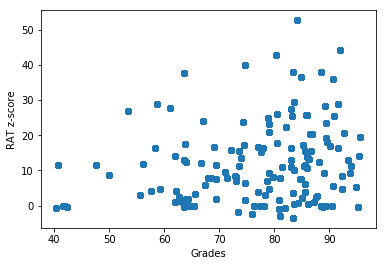

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df_sec1.grade, df_sec1['RAT+'])
plt.xlabel('Grades')
plt.ylabel('RAT z-score')

(array([  190.,    76.,   114.,   304.,   684.,   494.,   874.,   912.,
         1216.,   684.]),
 array([ 40.33333333,  45.86666667,  51.4       ,  56.93333333,
         62.46666667,  68.        ,  73.53333333,  79.06666667,
         84.6       ,  90.13333333,  95.66666667]),
 <a list of 10 Patch objects>)

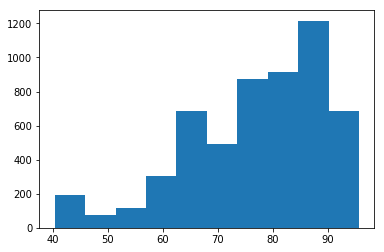

In [70]:
plt.hist(df_sec1.grade)

(array([ 1368.,   912.,  1216.,   798.,   418.,   494.,     0.,   228.,
           76.,    38.]),
 array([ -3.49355228,   2.12103723,   7.73562674,  13.35021625,
         18.96480576,  24.57939527,  30.19398478,  35.80857429,
         41.4231638 ,  47.03775332,  52.65234283]),
 <a list of 10 Patch objects>)

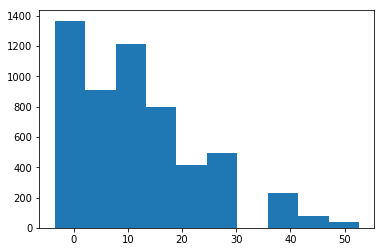

In [71]:
plt.hist(df_sec1['RAT+'])

In [72]:
from sklearn.model_selection import StratifiedKFold

X, y = df_sec1[["ActivitiesCorrectPercent","ActivitiesParticipationPercent","SlideDeckViewCount","SlideView","Attendance","RAT+","RAT-"]], df_sec1.ix[:,-1]

split = StratifiedKFold(random_state = 14)
for train_index, test_index in split.split(X,y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

for i in X_train, X_test, y_train, y_test:
    i.dropna(axis=0, how='all',inplace=True)

rf_clf = Pipeline((
        ['sca',StandardScaler()],
        ['clf',RandomForestClassifier()],
        ))
rf_clf.fit(X_train,y_train)
y_test_pred = rf_clf.predict(X_test)

confusion_matrix(y_test, y_test_pred)

array([[ 73,  16,  31],
       [ 12, 414, 153],
       [  9,  99, 909]])

In [74]:
X, y = df_sec1[["ActivitiesCorrectPercent","ActivitiesParticipationPercent","SlideDeckViewCount","SlideView","Attendance","RAT+","RAT-"]], df_sec1.ix[:,-1]

df_sec1

,userId,sectionId,thisDate,ActivitiesCorrectPercent,ActivitiesParticipationPercent,SlideDeckViewCount,SlideView,Attendance,RAT+,RAT-,grade,label
0,74c752ac-bc42-46e6-9e3b-c2834272ab5b,8dfdebba-0bff-4501-b6fd-d44e52e30af3,2017-01-04,-1.0,-1.00,1,3,1,11.183632,-11.183450,94.000000,2
1,b09581a6-0418-437c-b98d-ed3209f16f4f,8dfdebba-0bff-4501-b6fd-d44e52e30af3,2017-01-04,-1.0,-1.00,1,6,1,8.098578,-8.097083,79.833333,2
2,aaaf27c8-fc5d-4310-9613-fcc771dba8ff,8dfdebba-0bff-4501-b6fd-d44e52e30af3,2017-01-04,-1.0,-1.00,0,0,0,16.887731,-16.886750,90.166667,2
3,99a0fd51-94bb-444a-8bf8-a9f3752df697,8dfdebba-0bff-4501-b6fd-d44e52e30af3,2017-01-04,-1.0,-1.00,0,1,0,-2.509078,2.548591,76.000000,1
4,c28dbc72-c577-4223-abaf-acdf2f1bf829,8dfdebba-0bff-4501-b6fd-d44e52e30af3,2017-01-04,-1.0,-1.00,0,1,1,24.044925,-24.044216,67.000000,1
5,29ae6962-7a05-4c2c-b150-c4d61335e5b7,8dfdebba-0bff-4501-b6fd-d44e52e30af3,2017-01-04,-1.0,-1.00,0,0,0,0.000000,0.000000,65.166667,1
6,039ee7c8-50c6-4e46-b6fb-aa440e7b09a3,8dfdebba-0bff-4501-b6fd-d44e52e30af3,2017-01-04,-1.0,-1.00,2,9,1,11.554042,-11.550726,40.666667,0
7,c41cb88f-b7dc-47e1-ad0f-823275d09ef0,8dfdebba-0bff-4501-b6fd-d44e52e30af3,2017-01-04,-1.0,-1.00,1,7,1,25.684806,-25.684336,86.000000,2
8,98ea6c06-e7ce-4bc6-9047-99600bf1f8b6,8dfdebba-0bff-4501-b6fd-d44e52e30af3,2017-01-04,-1.0,-1.00,0,1,1,3.765070,-3.763652,85.666667,2
9,db9e2bda-b09d-4e80-83a7-4a512bddd1d5,8dfdebba-0bff-4501-b6fd-d44e52e30af3,2017-01-04,-1.0,-1.00,0,1,1,16.228604,-16.226190,58.333333,1


In [75]:
dates = sorted(list(set(df_sec1.thisDate)))

for date in dates[1:]:
    df_ALPdata_sec1_at_date = df_ALPdata_sec1[df_ALPdata_sec1.thisDate <= date]
    res = []
    for i in df_note_trend_sec1.userId.unique():
        x = df_note_trend_sec1[df_note_trend_sec1.updatedAt <= date]
        x = x[x['userId']==i]
        x = x.updatedAt.values
        r = generate_inter_arrival(x)
        res.append([i, rat_pos(r), rat_neg(r)])

    df_note_rat_sec1_at_date = pd.DataFrame(res, columns=['userId','RAT+', 'RAT-'])
    max_score = df_sec1_at_date.grade.max()

    df_sec1_at_date = df_ALPdata_sec1_at_date.merge(df_note_rat_sec1_at_date, on='userId',how='left').dropna()
    df_sec1_at_date = df_sec1_at_date.merge(df_examGrades_sec1, on='userId',how='left').dropna()
    df_sec1_at_date['label'] = 2
    df_sec1_at_date.loc[(df_sec1_at_date.grade >- (max_score*0.6)) & (df_sec1_at_date.grade < (max_score*0.8)),'label'] = 1
    df_sec1_at_date.loc[df_sec1_at_date.grade < (max_score*0.6),'label'] = 0
#     df_sec1_at_date = df_sec1_at_date.groupby('userId').mean()


    X, y = df_sec1_at_date[["ActivitiesCorrectPercent","ActivitiesParticipationPercent","SlideDeckViewCount","SlideView","Attendance","RAT+","RAT-"]], df_sec1_at_date.ix[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 14)

    rf_clf = Pipeline((
            ['sca',StandardScaler()],
            ['clf',DecisionTreeClassifier()],
            ))
    rf_clf.fit(X_train,y_train)

    y_test_pred = rf_clf.predict(X_test)

    print(date)
    print(confusion_matrix(y_test, y_test_pred))
    m = confusion_matrix(y_test, y_test_pred)
    print('fn score for class 0= ', (m[0][1]+m[0][2])/(m[0][0]+m[0][1]+m[0][2]))
    print('fp score for class 0= ', (m[1][0]+m[2][0])/(m[1][0]+m[1][1]+m[2][0]))
    print(' ')

2017-01-06 00:00:00
[[ 0  1  4]
 [ 0  5 16]
 [ 1 10 22]]
fn score for class 0=  1.0
fp score for class 0=  0.166666666667
 
2017-01-09 00:00:00
[[ 0  0  7]
 [ 1  5 17]
 [ 1 12 45]]
fn score for class 0=  1.0
fp score for class 0=  0.285714285714
 
2017-01-11 00:00:00
[[ 2  3  4]
 [ 3 19 23]
 [ 3 16 44]]
fn score for class 0=  0.777777777778
fp score for class 0=  0.24
 
2017-01-13 00:00:00
[[ 4  1  2]
 [ 1 15 39]
 [ 0 18 66]]
fn score for class 0=  0.428571428571
fp score for class 0=  0.0625
 
2017-01-18 00:00:00
[[ 4  5  9]
 [ 3 33 28]
 [ 1 18 75]]
fn score for class 0=  0.777777777778
fp score for class 0=  0.108108108108
 
2017-01-20 00:00:00
[[10  3  5]
 [ 2 37 26]
 [ 3 26 93]]
fn score for class 0=  0.444444444444
fp score for class 0=  0.119047619048
 
2017-01-23 00:00:00
[[15  1  7]
 [ 4 35 42]
 [ 2 30 98]]
fn score for class 0=  0.347826086957
fp score for class 0=  0.146341463415
 
2017-01-25 00:00:00
[[ 13   2   6]
 [  5  58  43]
 [  4  32 100]]
fn score for class 0=  0.3809

In [83]:
dates = sorted(list(set(df_sec1.thisDate)))
ptg_into_sem = []
fn = []
fp = []

for date in dates[1:]:
    df_ALPdata_sec1_at_date = df_ALPdata_sec1[df_ALPdata_sec1.thisDate <= date]
    res = []
    for i in df_note_trend_sec1.userId.unique():
        x = df_note_trend_sec1[df_note_trend_sec1.updatedAt <= date]
        x = x[x['userId']==i]
        x = x.updatedAt.values
        r = generate_inter_arrival(x)
        res.append([i, rat_pos(r), rat_neg(r)])

    df_note_rat_sec1_at_date = pd.DataFrame(res, columns=['userId','RAT+', 'RAT-'])

    df_sec1_at_date = df_ALPdata_sec1_at_date.merge(df_note_rat_sec1_at_date, on='userId',how='left').dropna()
    df_sec1_at_date = df_sec1_at_date.merge(df_examGrades_sec1, on='userId',how='left').dropna()
    df_sec1_at_date['label'] = 2
    df_sec1_at_date.loc[(df_sec1_at_date.grade >- (max_score*0.6)) & (df_sec1_at_date.grade < (max_score*0.8)),'label'] = 1
    df_sec1_at_date.loc[df_sec1_at_date.grade < (max_score*0.6),'label'] = 0
#     df_sec1_at_date = df_sec1_at_date.groupby('userId').mean()
    
    X, y = df_sec1_at_date[["ActivitiesCorrectPercent","ActivitiesParticipationPercent","SlideDeckViewCount","SlideView","Attendance","RAT+","RAT-"]], df_sec1_at_date.ix[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 14)

    rf_clf = Pipeline((
            ['sca',StandardScaler()],
            ['clf',DecisionTreeClassifier()],
            ))
    rf_clf.fit(X_train,y_train)

    y_test_pred = rf_clf.predict(X_test)

    m = confusion_matrix(y_test, y_test_pred)
    fn.append((m[0][1]+m[0][2])/(m[0][0]+m[0][1]+m[0][2]))
    fp.append((m[1][0]+m[2][0])/(m[1][0]+m[1][1]+m[2][0]))
    ptg_into_sem.append('{:.0f}%'.format((date - dates[0])/(dates[-1]-dates[0])*100))


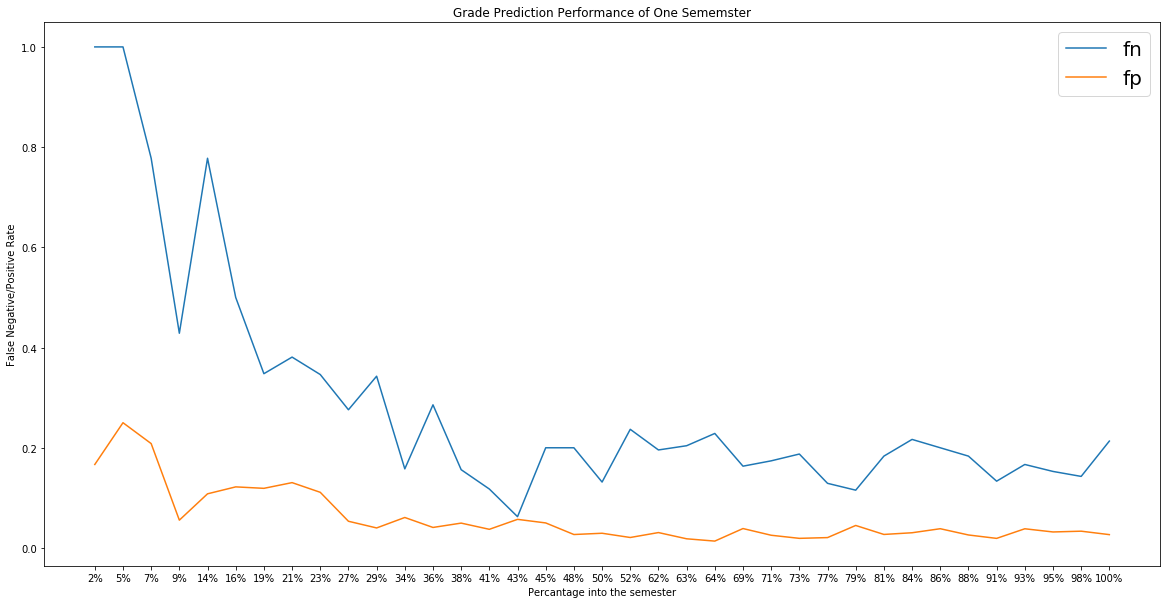

In [84]:
import seaborn as sns
# plt.figure(figsize=(20,10))
plt.plot(fn, label = 'fn')
plt.plot(fp, label = 'fp')
plt.xlabel('Percantage into the semester')
plt.ylabel('False Negative/Positive Rate')
plt.title('Grade Prediction Performance of One Sememster')
plt.xticks(range(len(ptg_into_sem)), ptg_into_sem)
plt.legend(loc=0, prop={'size': 20})

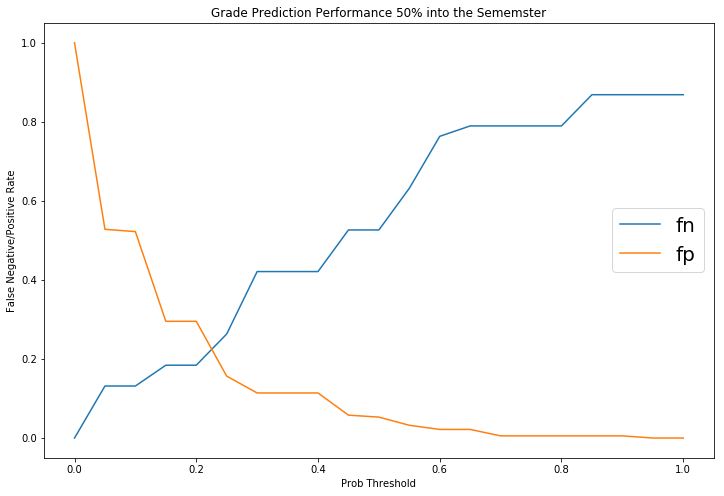

In [81]:
date = dates[int(len(dates)*0.5)]
df_ALPdata_sec1_at_date = df_ALPdata_sec1[df_ALPdata_sec1.thisDate <= date]
res = []
for i in df_note_trend_sec1.userId.unique():
    x = df_note_trend_sec1[df_note_trend_sec1.updatedAt <= date]
    x = x[x['userId']==i]
    x = x.updatedAt.values
    r = generate_inter_arrival(x)
    res.append([i, rat_pos(r), rat_neg(r)])

df_note_rat_sec1_at_date = pd.DataFrame(res, columns=['userId','RAT+', 'RAT-'])

df_sec1_at_date = df_ALPdata_sec1_at_date.merge(df_note_rat_sec1_at_date, on='userId',how='left').dropna()
df_sec1_at_date = df_sec1_at_date.merge(df_examGrades_sec1, on='userId',how='left').dropna()
df_sec1_at_date['label'] = 2
df_sec1_at_date.loc[(df_sec1_at_date.grade >- (max_score*0.6)) & (df_sec1_at_date.grade < (max_score*0.8)),'label'] = 1
df_sec1_at_date.loc[df_sec1_at_date.grade < (max_score*0.6),'label'] = 0
#     df_sec1_at_date = df_sec1_at_date.groupby('userId').mean()

X, y = df_sec1_at_date[["ActivitiesCorrectPercent","ActivitiesParticipationPercent","SlideDeckViewCount","SlideView","Attendance","RAT+","RAT-"]], df_sec1_at_date.ix[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 14)

rf_clf = Pipeline((
        ['sca',StandardScaler()],
        ['clf',RandomForestClassifier()],
        ))
rf_clf.fit(X_train,y_train)

y_test_pred_prob = rf_clf.predict_proba(X_test)

fn = []
fp = []
for threshold in np.linspace(0,1,21):
    y_test_pred = [1 if i[0] < threshold else 0 for i in y_test_pred_prob]
    m = confusion_matrix(y_test, y_test_pred)
    fn.append((m[0][1]+m[0][2])/(m[0][0]+m[0][1]+m[0][2]))
    fp.append((m[1][0]+m[2][0])/(m[1][0]+m[1][1]+m[2][0]))
# ptg_into_sem.append('{:.0f}%'.format((date - dates[0])/(dates[-1]-dates[0])*100))

plt.figure(figsize=(12,8))
plt.plot(np.linspace(0,1,21),fn,label = 'fn')
plt.plot(np.linspace(0,1,21),fp,label = 'fp')
plt.xlabel('Prob Threshold')
plt.ylabel('False Negative/Positive Rate')
plt.title('Grade Prediction Performance 50% into the Sememster')
# plt.xticks(np.linspace(0,1,21),np.linspace(0,1,21))
plt.legend(loc=0, prop={'size': 20})

In [34]:
for threshold in np.linspace(.15,0.35,5):
    y_test_pred = [1 if i[0] < threshold else 0 for i in y_test_pred_prob]
    m = confusion_matrix(y_test, y_test_pred)
    print('threshold=', threshold)
    print(m)
    print('fn=', (m[0][1]+m[0][2])/(m[0][0]+m[0][1]+m[0][2]))
    print('fp=', (m[1][0]+m[2][0])/(m[1][0]+m[1][1]+m[2][0]))
    print('\n')

threshold= 0.15
[[ 31   7]
 [ 51 495]]
fn= 0.184210526316
fp= 0.0934065934066


threshold= 0.2
[[ 31   7]
 [ 51 495]]
fn= 0.184210526316
fp= 0.0934065934066


threshold= 0.25
[[ 26  12]
 [ 26 520]]
fn= 0.315789473684
fp= 0.047619047619


threshold= 0.3
[[ 26  12]
 [ 26 520]]
fn= 0.315789473684
fp= 0.047619047619


threshold= 0.35
[[ 22  16]
 [ 16 530]]
fn= 0.421052631579
fp= 0.029304029304


